# 1. Function descriptions [#algorithms, optimization]: \ For each of the functions A to E, write a few sentences that address the following points. Be sure to also consider the “main program” portion of the code. Explain what this part does and how it connects to the functions below. [<100 words per function]

## 1. Describe which aspect of a genetic algorithm the function pertains to.<br> 2. Provide an overview of how the function accomplishes its task.<br>3. Specify the inputs, outputs, and any major data structures involved.

## Missing function: Function F currently does nothing. Use a process of elimination to determine, then describe, which common element of a genetic algorithm is missing from this program and could become F. Detail why this element of the algorithm is important for finding an optimal solution. Optional: Fill in F with working code that accomplishes this task.

In [206]:
### Genetic algorithm to fit a regression line of the form y=ax+b to a 2-variable dataset

import random # importing this library to generate random numbers
import numpy as np # importing numpy library to work with matrices and naming it as np

# load the data
my_data_file = 'temp_data.npy' # saving the file name
data = np.load(my_data_file) # opening the file through file name

# parameters
initial_pop_size = 100 # initial population size
mutation_rate = 0.05
num_generations = 10
chromosome_length = 2
num_survivors = 50

# functions

""" function A creates a pool of genes from which it then creates a population with
2-gene chromosomes and assigns to each member a random pair of genes out of the defined pool.
This function serves as population initialization.
Input: population size, chromosome length. Output: array of randomized pair of genes (chromosomes) """
def A():
    gene_pool = np.linspace(-1,80,num = 5000) # creating an evenly spaced array from -1 to 80 with 5000 numbers (genes) in it
    dimensions = (initial_pop_size, chromosome_length) # creating a tuple of initial population size and number of their chromosome lenghts
    return np.random.choice(gene_pool, size=dimensions, replace=False) # generate a initial population size (100) number of random combination of chromosole length number (2) of genes in a chromosome without replacement (without similar gene combinations in a different order)

""" function B calculates the average square residual for given coefficients by putting
the coefficients into the equation y = ax + b where a and b are coefficients and x and y are data points.
This function serves as part of the fitness-calculation function.
Input: coefficients, data. Output: average square residual for a given pair of coefficients """
def B(coefficients):
    global curGen, avgResiduals # making sure that these variables are global
    k = len(data) # saving number of lines
    tot = 0 # sum of square erros from actual point to the regression line
    for j in range(k): # looping k times (j = 0 -> k - 1)
        y = coefficients[0] * data[j,0] + coefficients[1] # y{regression} = kx + b
        res = data[j,1] - y # residual equals y{actual} minus y{regression}
        tot += res**2 # adding residual squared to the total sum
    
    avgResiduals[curGen].append(tot/k) # adding a chromosome's avg residual to the current generation
    return tot/k # returning arithmetic average residual squared

""" function C creates a fitness list, calculates the fitness
value of each chromosome and puts the values inside the list
This function serves as population fitness calculator.
Input: current_pop. Output: array of chromosomes' indices and fitnesses """
def C():
    global curGen, avgResiduals # making sure that these variables are global
    avgResiduals.append([]) # creating a new list within our list of generations to fill in individual chromosome's avg residual
    fitlist = [] # creating a list for chromosomes and their fitness
    for x in range(len(current_pop)): # looping len(current_pop) times (x = 0 -> len(current-pop) - 1)
        fitlist.append(np.array([x,B(current_pop[x])])) # adding an array of chromosome order and its fitness
    curGen += 1 # moving to next generation
    return np.array(fitlist) # returning the array of fitnesses

""" function D finds the best chromosome in a randomly selected set of survivors.
This function sorts out best chromosomes to then cross them over.
Input: fitness_vector, num_survivors. Output: a "best" chromosome """
def D():
    random_selection = np.random.choice(range(len(fitness_vector)), num_survivors//2, replace=False) # selecting (num_survivor div 2) number of random sets of chromosomes from the range of 0 to len(fitness_vector)-1 without replacements
    best = np.argmin(fitness_vector[random_selection,1]) # finding the index of the chromosome with the best fitness (lowest average square residual) out of the randomly selected ones
    best_index = random_selection[best] # finding the index in the fitness vector list
    return current_pop[int(fitness_vector[best_index][0])] # returning the "best" chromosome

""" function E crosses two random parents over. This function serves to create new offsprings.
Input: new_population, survivors, chromosome_length. Output: new chromosomes with recombined genes """
def E():
    duplicate_size = len(new_population) - len(survivors) # size of the empty submatrix in new_population
    duplicate_survivors = np.zeros((duplicate_size, chromosome_length)) # creating a matrix of size duplicate_size by 2
    for x in range(chromosome_length): # for x = 0 and 1
        duplicate_survivors[:, x] = np.repeat(survivors[:, x], 4, axis=0) # duplicating column 4 times
        duplicate_survivors[:, x] = np.random.permutation(duplicate_survivors[:, x]) # combining the genes randomly
    return duplicate_survivors # returning the new chromosomes
    

########################################################################
# Start of main program
current_pop = A() # initializing the population with random sets of genes
new_population = np.zeros((num_survivors * 5, chromosome_length)) # creating a matrix of 250 by 2 of zeros to fill in the survivors later on

avgResiduals = [] # defining our list of generations' avg square residuals
curGen = 0 # generation count

# main loop
for i in range(num_generations): # looping for the number of generation times
    
    fitness_vector = C() # creating a matrix of fitnesses for the chromosomes
    survivors = np.zeros((num_survivors, chromosome_length)) # creating a matix of 50 by 2 to fill in the survivors
    for n in range(len(survivors)): # looping len(survivors) times (n = 0 -> len(survivors) - 1)
        survivors[n] = D() # appending a "best" chromosome to the list of survivors
    new_population[:len(survivors)] = survivors # deep-copying the survivors into the new_population
    new_population[len(survivors):] = E() # permutations for the offsprings
    
    new_population = F(new_population) # mutation of invidividual genes
    
    current_pop = new_population # assigning new_population to current_pop
    new_population = np.zeros((num_survivors * 5, chromosome_length)) # re-emptying new_poplation

avgResiduals.append([]) # adding a new "generation" for the final result
    
fitness_vector = C() # creating the fitness matrix of the last generation
best_solution = current_pop[np.argmin(fitness_vector[:,1])] # finding the best chromosome (combination of 2 genes)
print("The best solution is", best_solution) # printing the best chromosome
print("with error equal to approximately", B(best_solution)) # printing its fitness

avgResiduals.pop() # deleting the last "generation," because it's irrelevant to out data

The best solution is [  0.36107221  75.85197039]
with error equal to approximately 36.5355045347


[36.535504534708188]

In [207]:
# scipy regression function to compare with the genetic algorithm's solutions
from scipy import stats
print(stats.linregress(data)[0:2])

(0.53992593932107447, 70.709972206845848)


# 2. Overview [#optimization, #algorithms, #regression]

## 1. Write a paragraph to explain what the parameters at the top of the script are. By experimenting with varying parameter values, determine what values produce solutions that are closest to the actual solution most efficiently. Why do you think this is? [\~200 words]

The parameters on top are required in order to apply the genetic algorithm in regression. Initial population size determines the pool size of chromosomes that we start with. Mutation rate sets how fast we want the regression coefficients to change. Number of generations tells us to stop tweaking coefficients at the last generation. Chromosome length is the number of features (genes) that each member of the population (chromosome) has. Number of survivors determines how many chromosomes we should pick at every stage (in this case, 1/2 every time). <br><br> Increasing the number of generations and decreasing the mutation rate (in some proportion) help increase the accuracy of the regression line. If we have more generations, we will have more "chances" to modify the coefficients to find the line of better fit. If we have a smaller mutation rate, we would be able to tweak the changes more precisely. However, if the number of generations is not big enough to accomodate the mutation rate, then the error will be unreasonable.

## 2. Write a paragraph that gives an overview of how this program solves the given task, and what the output represents. [\~200 words]

This program finds the regression line using the Genetic Algorithm. First, it initializes 5000 different genes. Secondly, it creates a population of 100 random chromosomes consisting 2 randomly selected genes from the provided 5000. Thirdly, it calculates the fitness coefficient of each chromosome in the current population using the calculated average square residuals (the less the residual is, the better the fitness is, because then the regression line would be better desribing data set). After, it performs crossover among chromosomes randomly and then mutation to create a new population. Then it loops everything for the number of generation times. At the last step, it finds the fittest chromosome in the last population and prints as the answer.<br><br>The output is a chromosome, in this case, a pair of numbers that represent the coefficients of a "regression line" for the given data. The error is average residual squared (how on average actual points differ from the value predicted by the regression line).

# 3. Optional challenges (basic):

## 1. Modify the program to include a visualization of how the error / fitness changes with each subsequent generation. Interpret this however you like, but make sure to include a prose explanation, and to label your visualization well.

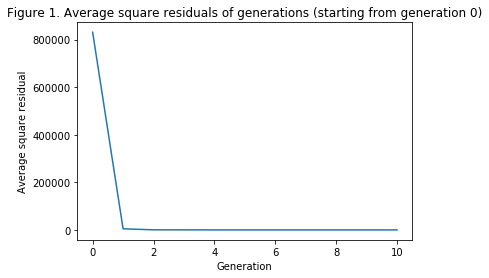

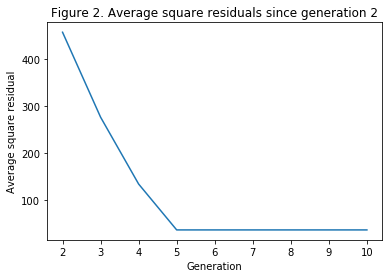

In [208]:
from matplotlib import pyplot as plt # importing pyplot

plt.plot(range(curGen), list(map(lambda x: sum(x) / len(x), avgResiduals))) # plotting the average residuals of generations againts generations
plt.title("Figure 1. Average square residuals of generations (starting from generation 0)")
plt.xlabel("Generation")
plt.ylabel("Average square residual")
plt.show()

plt.plot(range(curGen)[2:], list(map(lambda x: sum(x) / len(x), avgResiduals))[2:]) # slicing from generation 2 and after to show to smaller changes
plt.title("Figure 2. Average square residuals since generation 2")
plt.xlabel("Generation")
plt.ylabel("Average square residual")
plt.show()

In this task I applied the HC #dataviz by choosing 2 different scales to show the overall picture and a close-up look of a trend. Besides, I used labels for the axes that are informative and easy to understand.

# 2. Fill in function F with working code that accomplishes the task you described above. Be sure to annotate your code.

In [194]:
""" function F mutates individual genes in chromosomes with a probability.
This function maintains genetic diversity from one generation of a population of genetic algorithm chromosomes to the next.
Therefore, Genetic Algorithm can come to a better solution using mutation. 
Input: chromosomes. Output: chromosomes with mutations """
def F(chromosomes): # mutation of invidividual genes
    for chain in chromosomes: # iterating through every chromosome
        for gene in chain: # iterating through every gene in a chromosome
            outcome = random.randint(1, 20) # creating 50 possibilities, out of which 2 will be mutation
            # 10% of gene mutation by mutation_rate:
            if (outcome == 1): # choosing one of 20 outcomes
                gene *= (1 - mutation_rate) # mutate
            elif (outcome == 20 and -1 < gene * (1+mutation_rate) < 80): # checking if the gene exists (within our range)
                gene *= (1 + mutation_rate) # mutate
        
    return chromosomes # returning the result

I applied the HC #algorithm by creating a concise mutation algorithm that involves probability. I made sure that mutations did not get the genes out of the gene pool. Therefore, this algorithm gives us correct results.